# MODEL TRAINING

### Importing required packages and data

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings


In [122]:
df = pd.read_csv('data/stud.csv')
# import os
# os.getcwd()

In [123]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [124]:
# X = df.iloc[:, [0, 1, 2, 3, 4, 6, 7]]
# y = df.iloc[:, 5]
X = df.drop(columns = ['math_score'])
y = df['math_score']
print('X = \n',X)
print('y = \n',y)

X = 
      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  reading_score  writing_score  
0                      none             72             74  
1        

In [125]:
for i in X.columns:
    if X[i].dtype == 'O':
        print(df[i].unique(), df[i].value_counts())

['female' 'male'] gender
female    518
male      482
Name: count, dtype: int64
['group B' 'group C' 'group A' 'group D' 'group E'] race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
['standard' 'free/reduced'] lunch
standard        645
free/reduced    355
Name: count, dtype: int64
['none' 'completed'] test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [126]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

ct = ColumnTransformer(transformers = [('OnehotEncoder', OneHotEncoder(), cat_features), 
                                       ('StandardScaler', StandardScaler(), num_features)], remainder = 'passthrough')
X = ct.fit_transform(X)

In [127]:
X.shape

(1000, 19)

### Splitting the dataset into training set and test set

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(800, 19) (200, 19)


#### Metric Evaluation function

In [129]:
def evaluate(y_true, y_predi):
    r2 = r2_score(y_true, y_predi)
    rmse = np.sqrt(mean_squared_error(y_true, y_predi))
    mae = mean_absolute_error(y_true, y_predi)
    return mae, rmse, r2

### Models

In [130]:
models = {'Linear Regression': LinearRegression(),
          'Lasso': Lasso(),
          'Ridge': Ridge(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'SVR': SVR(),
          'DecisionTreeRegressor': DecisionTreeRegressor(),
          'RandomForestRegressor': RandomForestRegressor(),
          'AdaBoostRegressor': AdaBoostRegressor(),
          'XGBRegressor': XGBRegressor(),
          'CatBoostRegressor': CatBoostRegressor()}
model_list = []
r2_list = []

In [131]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
    test_mae, test_rmse, test_r2  = evaluate(y_test, y_test_pred)
    
    print("MODEL:", list(models.keys())[i])
    print('Model performance on Training Set:')
    print('Mean Absolute Error:', train_mae)
    print('Root Mean Squared Error: ', train_rmse)
    print('R2 Score: ', train_r2)

    print('----------------------------------------------------')

    print('Model performance on Training Set:')
    print('Mean Absolute Error:', test_mae)
    print('Root Mean Squared Error: ', test_rmse)
    print('R2 Score: ', test_r2)

    model_list.append(list(models.keys())[i])
    r2_list.append(test_r2)
    
    print('*'*50)
    print('\n')

MODEL: Linear Regression
Model performance on Training Set:
Mean Absolute Error: 4.232109375
Root Mean Squared Error:  5.284707170961557
R2 Score:  0.8787938373315798
----------------------------------------------------
Model performance on Training Set:
Mean Absolute Error: 4.3896875
Root Mean Squared Error:  5.568972708790195
R2 Score:  0.8631366370261728
**************************************************


MODEL: Lasso
Model performance on Training Set:
Mean Absolute Error: 5.19899517882007
Root Mean Squared Error:  6.610227113791933
R2 Score:  0.8103662607143668
----------------------------------------------------
Model performance on Training Set:
Mean Absolute Error: 5.356600139562404
Root Mean Squared Error:  6.70213387278806
R2 Score:  0.8017728098620085
**************************************************


MODEL: Ridge
Model performance on Training Set:
Mean Absolute Error: 4.226751355904577
Root Mean Squared Error:  5.281801947426221
R2 Score:  0.8789270648480682
-------------

In [132]:
list(models.keys())[0]
list(models.values())[0]

LinearRegression()

In [133]:
# print(np.concatenate((model_list.reshape(-1, 1), r2_list.reshape(-1, 1)), 1))
final = pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model_Name', 'R2_Score'])
final.sort_values(by = ['R2_Score'],ascending = False)

,Model_Name,R2_Score
2,Ridge,0.863213
0,Linear Regression,0.863137
6,RandomForestRegressor,0.857855
9,CatBoostRegressor,0.857797
8,XGBRegressor,0.818506
7,AdaBoostRegressor,0.815718
1,Lasso,0.801773
3,KNeighborsRegressor,0.789902
4,SVR,0.783142
5,DecisionTreeRegressor,0.749759


##### Linear Regression

In [134]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
r2_score1 = r2_score(y_test, y_pred)
print('Accuracy of the model: ', r2_score1*100)


Accuracy of the model:  86.31366370261728


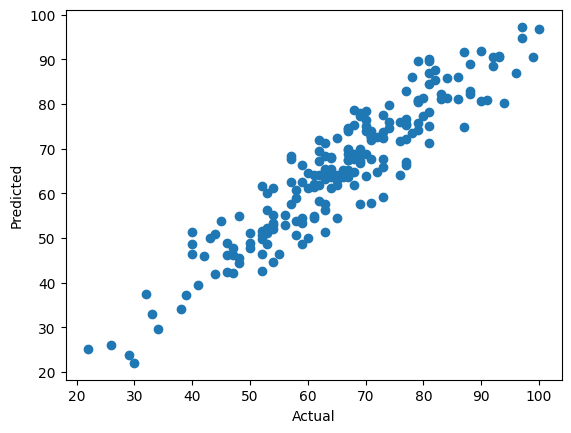

In [ ]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

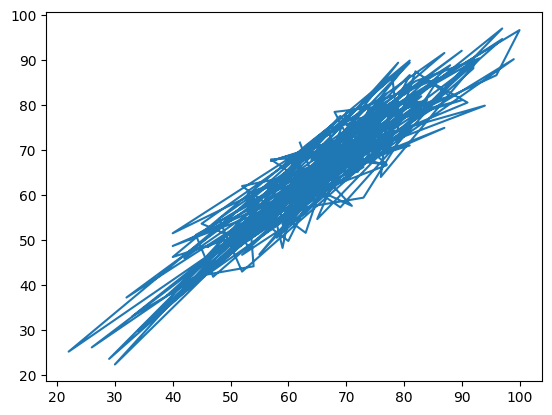

In [144]:
plt.plot(y_test, y_pred)

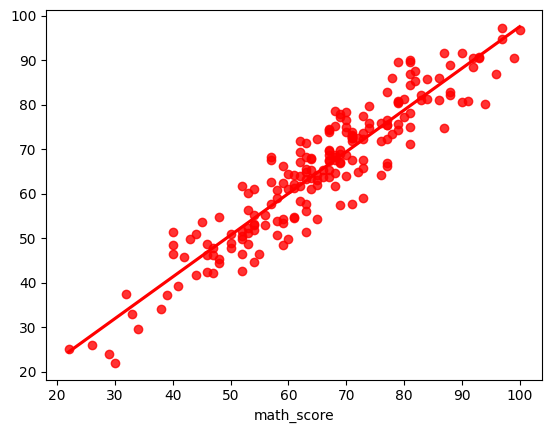

In [136]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [137]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
993,62,61.8125,0.1875
859,87,74.7500,12.2500
298,40,48.5625,-8.5625
553,77,66.3125,10.6875
672,69,69.8125,-0.8125
...,...,...,...
679,63,63.2500,-0.2500
722,74,75.8750,-1.8750
215,84,81.3750,2.6250
653,65,61.9375,3.0625
